<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/Processamento_Linguagem_Natural_NLTK_spaCy_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Natural Language Processing with NLTK and Spacy***

In [1]:
import bs4 as bs #processamento de dados que estão na web
import urllib.request
import nltk
import spacy


ERROR: Could not find a version that satisfies the requirement pt (from versions: none)
ERROR: No matching distribution found for pt


**Marcação POS(Part of Speech)**

In [12]:
pln = spacy.load("en_core_web_sm")
pln

In [16]:
documento = pln('Natural Language, Computer Vision')

In [17]:
type(documento)

spacy.tokens.doc.Doc

In [18]:
for token in documento:
  print(token.text, token.pos_)

Natural PROPN
Language PROPN
, PUNCT
Computer PROPN
Vision NOUN


Lematização & Stemização

In [20]:
for token in documento:
  print(token.text, token.lemma_)

Natural Natural
Language Language
, ,
Computer Computer
Vision vision


In [23]:
doc = pln('i found i have found i wll find i would find coursing course coursed')
[token.lemma_ for token in doc]


['i',
 'find',
 'i',
 'have',
 'find',
 'i',
 'wll',
 'find',
 'i',
 'would',
 'find',
 'course',
 'course',
 'course']

In [22]:
type(doc)

spacy.tokens.doc.Doc

In [24]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [29]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [30]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Natural Natural natur
Language Language languag
, , ,
Computer Computer comput
Vision vision vision


usando o stemmer as palvras podem perder sentido, então devemos usar mais a lematização do que a stemização

**Carregando a base**

In [31]:
dados = urllib.request.urlopen('https://en.wikipedia.org/wiki/Data_science')

In [32]:
dados

In [33]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f9eadc28-cc51-40f4-91c4-c914b5f69932","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1055090265,"wgRevisionId":1055090265,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Co

In [34]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f9eadc28-cc51-40f4-91c4-c914b5f69932","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1055090265,"wgRevisionId":1055090265,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer 

In [38]:
paragrafos = dados_html.find_all('p') # se fosse o texto todo seria 'a'


In [39]:
len(paragrafos)

14

em 14 paragrafos existe este conteúdo

In [43]:
paragrafos[1] #testando os textos no 2 pararafo....podia ser em outros como [0],[2],etc

<p><b>Data science</b> is an <a href="/wiki/Interdisciplinarity" title="Interdisciplinarity">interdisciplinary</a> field that uses scientific methods, processes, algorithms and systems to extract <a href="/wiki/Knowledge" title="Knowledge">knowledge</a> and insights from noisy, structured and <a href="/wiki/Unstructured_data" title="Unstructured data">unstructured data</a>,<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup> and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to <a href="/wiki/Data_mining" title="Data mining">data mining</a>, <a href="/wiki/Machine_learning" title="Machine learning">machine learning</a> and <a href="/wiki/Big_data" title="Big data">big data</a>.
</p>

In [45]:
paragrafos[1].text #assim tiramos as tags <p>

'Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\n'

In [48]:
conteudo =''
for p in paragrafos:
  conteudo += p.text #concatenando....


In [49]:
conteudo

'\nData science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data.[3] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the 

temos o conteudo completo da página

In [50]:
conteudo = conteudo.lower()
conteudo

'\ndata science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data,[1][2] and apply knowledge and actionable insights from data across a broad range of application domains. data science is related to data mining, machine learning and big data.\ndata science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data.[3] it uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. however, data science is different from computer science and information science. turing award winner jim gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the 

aqui tiramos as letras maiusculas

**Busca em textos com spaCy**

In [52]:
pln = spacy.load('en_core_web_sm')
pln

In [54]:
pln.vocab

In [53]:
string_busca = 'turing'
token_pesquisa = pln(string_busca)

In [66]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('search', None, token_pesquisa)

In [67]:
docs = pln(conteudo)
matches = matcher(docs)
matches

[(295895373269394349, 134, 135)]

encontrou a palavra 'turing' 1 vez, nas posilões 134 e 135, como vamos ver abaixo:

In [59]:
docs[134:135]

turing

In [61]:
matches[0] #aqui só temos 1 caso mesmo(nosso[0])

(295895373269394349, 134, 135)

se tivessemos mais palavras TURING, ou se trocarmos a palavra por outra, poderiamos digitar o código abaixo:

In [62]:
#matches[0],matches[0][1],macthes[0][2]

In [63]:
from IPython.core.display import HTML

In [96]:
texto = ' '
numero_palavras = 50
document = pln(conteudo)
matches = matcher(document)

display(HTML(f'<h1>{string_busca.upper()}</h1>')) # f é padrao para HTML e <h1> é bem usado também
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>""")) #contatenando de certa forma
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(document[inicio:i[2] + numero_palavras]).replace(string_busca, f"<mark>{string_busca}</mark>") #replace é pra ter realce no texto da palavra 'turing'
  texto += "<br /><br />"
display(HTML(f"""... {texto} ..."""))

**Extração de entidades nomeadas**

# *NER*

In [98]:
for entidade in document.ents:
  print(entidade.text, entidade.label_)

noisy DATE
data,[1][2 ORG
jim gray PERSON
fourth ORDINAL
nathan yau PERSON
ben fry PERSON
2015 DATE
the american statistical association ORG
three CARDINAL
andrew gelman PERSON
columbia university ORG
stanford ORG
david donoho PERSON
1962 DATE
john tukey PERSON
1985 DATE
the chinese academy of sciences ORG
beijing GPE
c.f GPE
jeff wu PERSON
first ORDINAL
1992 DATE
the university of montpellier ii ORG
1974 DATE
peter naur PERSON
1996 DATE
the international federation of classification societies ORG
first ORDINAL
flux GPE
1985 DATE
the chinese academy of sciences ORG
beijing GPE
1997 DATE
jeff wu PERSON
1998 DATE
hayashi chikio PERSON
three CARDINAL
the 1990s DATE
william s. cleveland.[24 PERSON
2001 DATE
the next few years DATE
2002 DATE
2003 DATE
columbia university ORG
the journal of data science.[23] ORG
2014 DATE
the american statistical association's ORG
dj patil ORG
jeff PERSON
the national science board ORG
2005 DATE
the 21st century DATE


aqui se identifica as pessoas, as localizações..., etc

In [99]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter =True)

aqui se fez as marcações em textos detectados no código acima

**Nuvem de Palavras / Stop Words**

In [132]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'nevertheless', 'its', 'latterly', 'we', '‘d', 'full', 'anywhere', 'whole', 'n’t', 'amongst', 'fifteen', 'well', 'more', 'thence', 'were', 'upon', 'above', 'using', 'even', 'becoming', 'in', 'sometimes', 'whereafter', 'became', 'may', '’s', '‘s', 'whereupon', 'everywhere', 'many', 'since', 'does', 'there', 'here', 'none', 'again', 'then', 'noone', 'either', 'almost', 'one', 'very', 'already', 'put', 'during', 'anything', 'anyway', 'cannot', 'from', 'various', 'nine', 'else', "'s", 'them', 'off', 'done', 'an', 'i', 'about', 'besides', 'nobody', 'just', 'go', 'you', 'she', 'into', 'herself', 'herein', 'keep', 'across', 'hereafter', 'whereas', 'should', 'several', "'ll", 'bottom', 'can', 'anyhow', 'seeming', 'so', 'together', 'though', 'also', 'become', 'both', 'all', 'our', 'something', 'out', 'afterwards', 'however', 'except', 'often', 'over', 'please', 'around', 'most', 'same', 'with', 'are', 'beforehand', '‘ve', 'how', 'your', "'re", 'being', 'along', 'enough', 'do', 'might', 'seriou

In [123]:
len(STOP_WORDS)

413

código acima são as palavras que serão retiradas

AGORA vamos ver se no nosso texto tem essas STOP_WORDS, para então removermos, vamos lá:

In [133]:
pln.vocab['walk'].is_stop # aqui podemos ver se a palavra é uma stop word

False

In [134]:
pln.vocab['we'].is_stop # aqui podemos ver se a palavra é uma stop word

True

In [137]:
docus = pln(conteudo)
lista_token = []
for token in docus:
  lista_token.append(token.text) #para fazer virar no formato spaCy

In [138]:
print(lista_token)

['\n', 'data', 'science', 'is', 'an', 'interdisciplinary', 'field', 'that', 'uses', 'scientific', 'methods', ',', 'processes', ',', 'algorithms', 'and', 'systems', 'to', 'extract', 'knowledge', 'and', 'insights', 'from', 'noisy', ',', 'structured', 'and', 'unstructured', 'data,[1][2', ']', 'and', 'apply', 'knowledge', 'and', 'actionable', 'insights', 'from', 'data', 'across', 'a', 'broad', 'range', 'of', 'application', 'domains', '.', 'data', 'science', 'is', 'related', 'to', 'data', 'mining', ',', 'machine', 'learning', 'and', 'big', 'data', '.', '\n', 'data', 'science', 'is', 'a', '"', 'concept', 'to', 'unify', 'statistics', ',', 'data', 'analysis', ',', 'informatics', ',', 'and', 'their', 'related', 'methods', '"', 'in', 'order', 'to', '"', 'understand', 'and', 'analyze', 'actual', 'phenomena', '"', 'with', 'data.[3', ']', 'it', 'uses', 'techniques', 'and', 'theories', 'drawn', 'from', 'many', 'fields', 'within', 'the', 'context', 'of', 'mathematics', ',', 'statistics', ',', 'comput

In [139]:
len(lista_token)

1159

In [141]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [143]:
print(sem_stop)

['\n', 'data', 'science', 'interdisciplinary', 'field', 'uses', 'scientific', 'methods', ',', 'processes', ',', 'algorithms', 'systems', 'extract', 'knowledge', 'insights', 'noisy', ',', 'structured', 'unstructured', 'data,[1][2', ']', 'apply', 'knowledge', 'actionable', 'insights', 'data', 'broad', 'range', 'application', 'domains', '.', 'data', 'science', 'related', 'data', 'mining', ',', 'machine', 'learning', 'big', 'data', '.', '\n', 'data', 'science', '"', 'concept', 'unify', 'statistics', ',', 'data', 'analysis', ',', 'informatics', ',', 'related', 'methods', '"', 'order', '"', 'understand', 'analyze', 'actual', 'phenomena', '"', 'data.[3', ']', 'uses', 'techniques', 'theories', 'drawn', 'fields', 'context', 'mathematics', ',', 'statistics', ',', 'computer', 'science', ',', 'information', 'science', ',', 'domain', 'knowledge', '.', ',', 'data', 'science', 'different', 'computer', 'science', 'information', 'science', '.', 'turing', 'award', 'winner', 'jim', 'gray', 'imagined', 'd

In [142]:
len(sem_stop)

761

In [144]:
from matplotlib.colors import ListedColormap
cor_map = ListedColormap(['red','green','yellow','pink'])


In [145]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words=100, colormap=cor_map)

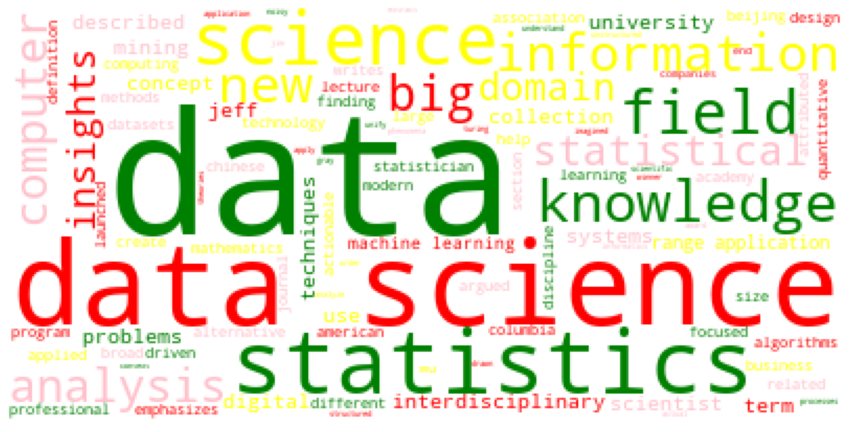

In [148]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))  # cloud generate gerar uma nuvem # conversao lista para string # sem as palavras STOPWORDS já
plt.figure(figsize=(15,15))
plt.imshow(cloud)  #para mostrar a nuvem
plt.axis('off')
plt.show()

agora temos as palavras mais repetidas e?ou importantes em destaque na NUVEM; com isso temos ideia do que esta sendo discutido no artigo apenas por olhar esta nuvem de palavras principais